In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use("ggplot")
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.3.4


In [3]:
!pip install folium
import folium

In [4]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install geojson
import geojson as gj
!pip install plotly
import plotly.express as px
import json
import urllib.request
import requests
from urllib.request import urlopen

from IPython.display import display

plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

In [6]:
df.shape

(13490604, 7)

In [7]:
print("Cek nilai kosong pada dataframe")
df.isnull().any()

Cek nilai kosong pada dataframe


lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [8]:
df2=df[['borough','value']]

In [10]:
year = df['year'].unique()
sumyear = df.groupby('year').sum()
sums = sumyear['value'].to_numpy()

n = len(year)
for i in range(n):
    for j in range(0, n-i-1):
        if year[j] > year[j+1] :
                year[j], year[j+1] = year[j+1], year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
                
print("Years:  ")
print(year)
print("Jumlah kasus kejahatan yang terjadi tiap tahun:")
print(sums)


Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Jumlah kasus kejahatan yang terjadi tiap tahun:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


(array([670000., 680000., 690000., 700000., 710000., 720000., 730000.,
        740000., 750000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

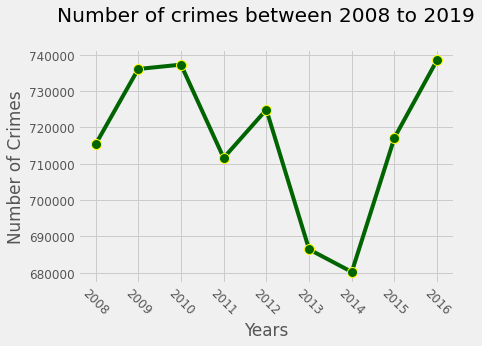

In [28]:
pos1 = np.arange(len(year))
plt.xticks(pos1,year)
plt.plot(sums,color='darkgreen')
plt.plot(sums,'o', color='darkgreen', markeredgecolor='yellow', markersize=10)
plt.xticks(pos1,year)
plt.title("Number of crimes between 2008 to 2019\n")
plt.xlabel('Years')
plt.ylabel("Number of Crimes")
plt.xticks(rotation=-45 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Di atas merupakan gambar dari trend nilai number of crimes dari database yang ada. Ditunjukkan nilai kejahatan mengalami fluktuasi dan cenderung menurun dari 2010 hingga 2014, namun mengalami pelonjakan nilai hingga tahun 2016.